<a href="https://colab.research.google.com/github/DeepaliJosh/Car-Sales-Prediction/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car=pd.read_csv("/content/Car_sales.csv")

In [ ]:
car.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,01-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,03-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [ ]:
car.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')

In [ ]:
car.describe()

,Sales in thousands
count,157.000000
mean,52.998076
std,68.029422
min,0.110000
25%,14.114000
50%,29.450000
75%,67.956000
max,540.561000


From this we can inrefer that all our columns are in object type so now we convert them into int or the required type


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [ ]:
car.shape

(157, 15)

In [ ]:
car.isnull().sum()
car.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,01-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,03-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


Here you can observe that there are no NaN (misssing values) but instead of that when you print the head you can also find that you have "." in your dataset.

In [ ]:
(car==".").sum()

Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         3
Latest Launch           0
dtype: int64

Now, we can observe that there are

> 36 "." in 4- year resale value

> 3 "." in Fuel efficiency


You can drop the rows that contain 1 or 2 "."


Now we have to replace the above missing values. For that 1st we have to convert the "." into an int 0.







In [ ]:
car=car.replace('.',0);
car.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-Mar-15
2,Acura,CL,14.114,18.225,Passenger,0,3.2,225,106.9,70.6,192,3.47,17.2,26,01-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,03-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [ ]:
carp = car.astype({'4-year resale value':'float64','Price in thousands':'float64','Engine size':'float64','Horsepower':'int64','Wheelbase':'float64','Fuel capacity':'float64','Fuel efficiency':'int64','Length':'float64','Width':'float64','Curb weight':'float64'})

In [ ]:
carp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    float64
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    float64
 6   Engine size          157 non-null    float64
 7   Horsepower           157 non-null    int64  
 8   Wheelbase            157 non-null    float64
 9   Width                157 non-null    float64
 10  Length               157 non-null    float64
 11  Curb weight          157 non-null    float64
 12  Fuel capacity        157 non-null    float64
 13  Fuel efficiency      157 non-null    int64  
 14  Latest Launch        157 non-null    object 
dtypes: float64(9), int64(2), object(4)
memor

In [ ]:
carp.Model.value_counts().count()
#I just checked if there are any common car models

156

In [ ]:
carp.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,02-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,06-Mar-15
2,Acura,CL,14.114,18.225,Passenger,0.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,01-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,03-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10-Aug-15


In [ ]:
(carp==0).sum()

Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         3
Latest Launch           0
dtype: int64

<ipython-input-18-3ee8646cfce5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(carp['4-year resale value'])


<Axes: xlabel='4-year resale value', ylabel='Density'>

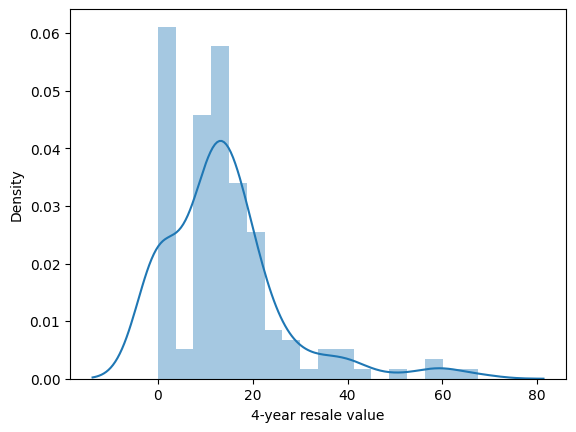

In [ ]:
sns.distplot(carp['4-year resale value'])
# sns.distplot(carp['4-year resale value'], kde = False, color ='red', bins = 30)

<ipython-input-19-7f02b72e63f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(carp['Fuel efficiency'])


<Axes: xlabel='Fuel efficiency', ylabel='Density'>

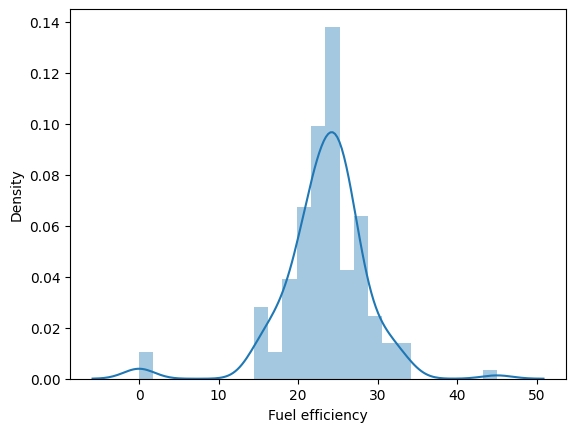

In [ ]:
sns.distplot(carp['Fuel efficiency'])

In [ ]:
carp['4-year resale value'].unique()

array([16.36 , 19.875, 18.225, 29.725, 22.255, 23.555, 39.   ,  0.   ,
       28.675, 36.125, 12.475, 13.74 , 20.19 , 13.36 , 22.525, 27.1  ,
       25.725,  9.25 , 11.225, 10.31 , 11.525, 13.025, 36.225,  9.125,
        5.16 , 12.36 , 14.18 , 13.725, 12.64 , 17.325, 19.54 ,  7.75 ,
       12.545, 10.185, 12.275, 58.47 , 15.06 , 15.51 , 13.425, 11.26 ,
       12.025,  7.425, 12.76 ,  8.835, 10.055, 14.21 , 16.64 , 13.175,
       23.575,  7.85 , 15.075,  9.85 , 13.21 , 17.71 , 17.525, 19.49 ,
        5.86 ,  7.825,  8.91 , 19.69 , 13.475, 13.775, 18.81 , 26.975,
       32.075, 40.375, 20.525, 21.725,  8.325, 10.395, 10.595, 16.575,
       20.94 , 19.125, 13.88 ,  8.8  , 13.89 , 11.03 , 14.875, 20.43 ,
       14.795, 26.05 , 41.45 , 50.375, 58.6  ,  8.45 , 11.295, 15.125,
       15.38 , 17.81 , 11.24 , 19.89 , 19.925, 15.24 ,  9.8  , 13.79 ,
       10.29 , 17.805, 14.01 , 13.225, 41.25 , 60.625, 67.55 ,  9.2  ,
       10.59 , 10.79 , 10.025, 13.245, 18.14 , 15.445,  9.575, 13.325,
      

In [ ]:
carp['Fuel efficiency'].unique()
#Discrete Data (It is always Preferable to replace the values through mode)

array([28, 25, 26, 22, 27, 21, 24, 23, 15, 33, 45,  0, 29, 16, 17, 19, 30,
       18, 32, 31, 20])

In [ ]:
def impute_nan(carp,variable,aggregate):
    carp[variable+"_imputed"]=carp[variable].replace(0,aggregate)

In [ ]:
mode_fe=carp['Fuel efficiency'].mode()
mode_fe[0]

25

In [ ]:
mode_fe=carp['Fuel efficiency'].mode()
median_rv=carp['4-year resale value'].median()

impute_nan(carp,'Fuel efficiency',mode_fe[0])
impute_nan(carp,'4-year resale value',median_rv)

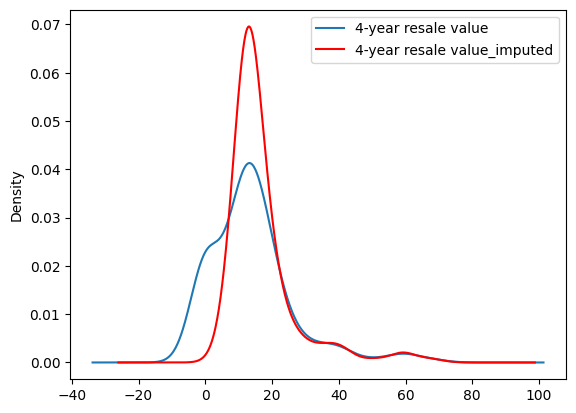

In [ ]:
fig, ax = plt.subplots()
carp['4-year resale value'].plot(kind='kde', ax=ax)
carp['4-year resale value_imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
print(carp['4-year resale value'].std())
print(carp['4-year resale value_imputed'].std())

12.609543227567295
10.268387553233959


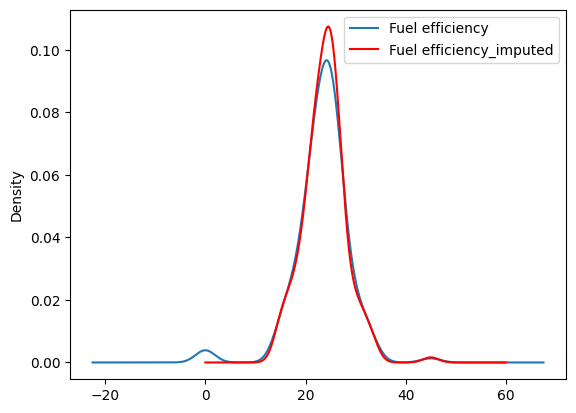

In [ ]:
fig, ax = plt.subplots()
carp['Fuel efficiency'].plot(kind='kde', ax=ax)
carp['Fuel efficiency_imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
print(carp['Fuel efficiency'].std())
print(carp['Fuel efficiency_imputed'].std())

5.358493954041161
4.244295630912205


In [ ]:
# carpp = carp.drop((carp==0).any(axis=1), axis=0)
# # drop rows with any zero value in any column

carp.replace(0, pd.np.nan, inplace=True)

# drop rows containing NaN
carp.dropna(inplace=True)

<ipython-input-29-8db0fe76dd6d>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  carp.replace(0, pd.np.nan, inplace=True)


In [ ]:
(carp==0).sum()

Manufacturer                   0
Model                          0
Sales in thousands             0
4-year resale value            0
Vehicle type                   0
Price in thousands             0
Engine size                    0
Horsepower                     0
Wheelbase                      0
Width                          0
Length                         0
Curb weight                    0
Fuel capacity                  0
Fuel efficiency                0
Latest Launch                  0
Fuel efficiency_imputed        0
4-year resale value_imputed    0
dtype: int64

In [ ]:
carp[['Day','Month','Year']]=carp['Latest Launch'].str.split('-',expand=True)

carp['Year']='20'+carp['Year'].astype(str)
carp
# spliting the latest launch (Date columns)

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch,Fuel efficiency_imputed,4-year resale value_imputed,Day,Month,Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-Feb-14,28,16.360,02,Feb,2014
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-Mar-15,25,19.875,06,Mar,2015
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-Oct-15,22,29.725,03,Oct,2015
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15,27,22.255,10,Aug,2015
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,08-Sep-15,22,23.555,08,Sep,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,24-Jan-15,26,11.425,24,Jan,2015
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,27-Aug-15,26,13.240,27,Aug,2015
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,30-Oct-14,27,16.725,30,Oct,2014
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,31-May-15,26,16.575,31,May,2015


In [ ]:
# carp.drop(columns='Latest Launch',inplace=True)
carp.drop(columns=['Fuel efficiency','4-year resale value'],inplace=True)

In [ ]:
carp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 117 non-null    object 
 1   Model                        117 non-null    object 
 2   Sales in thousands           117 non-null    float64
 3   Vehicle type                 117 non-null    object 
 4   Price in thousands           117 non-null    float64
 5   Engine size                  117 non-null    float64
 6   Horsepower                   117 non-null    float64
 7   Wheelbase                    117 non-null    float64
 8   Width                        117 non-null    float64
 9   Length                       117 non-null    float64
 10  Curb weight                  117 non-null    float64
 11  Fuel capacity                117 non-null    float64
 12  Latest Launch                117 non-null    object 
 13  Fuel efficiency_impu

<ipython-input-34-636dbadad689>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Year',y = 'Price in thousands',data = carp,ci=None)


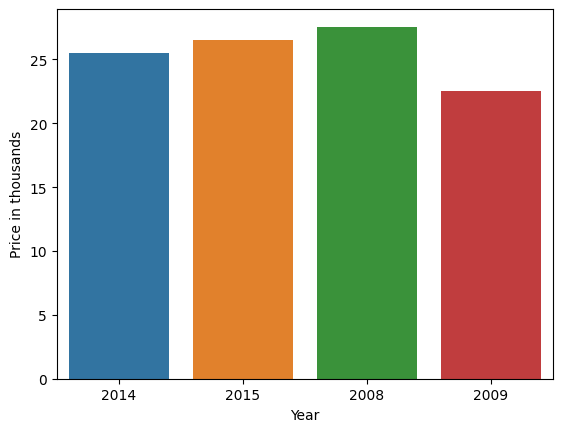

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Year',y = 'Price in thousands',data = carp,ci=None)
plt.show()

2008 has the highest price in thousands and 2009 has the lowest price in thousands.

<ipython-input-35-b91850033b2f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Year',y = 'Sales in thousands',data = carp,ci=None)


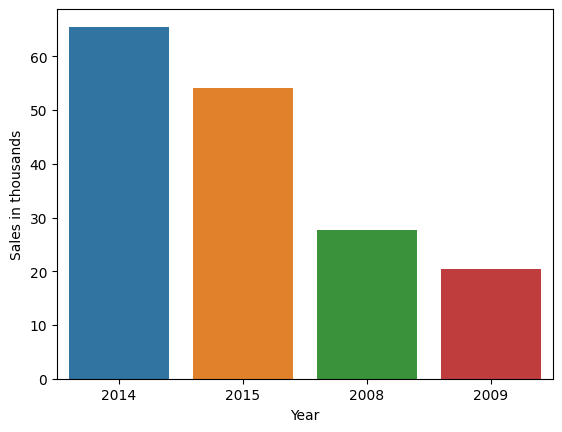

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Year',y = 'Sales in thousands',data = carp,ci=None)
plt.show()

2014 has the highest sales in thousands and 2009 has the lowest sales in thousands.

<ipython-input-36-062666ff9b9c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Month',y = 'Price in thousands',data = carp,ci=None)


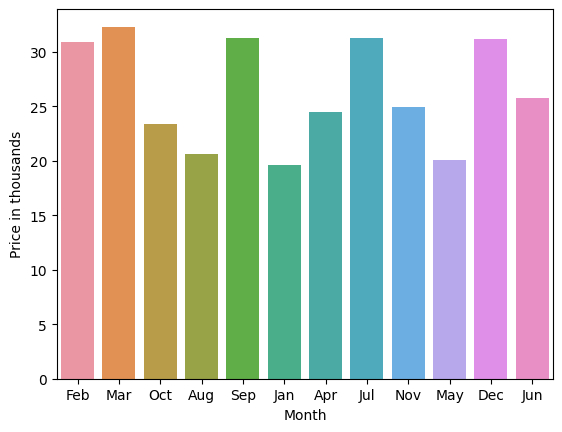

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Month',y = 'Price in thousands',data = carp,ci=None)
plt.show()

March has the highest price in thousands and January has the lowest price in thousands.

<ipython-input-37-d32f51c7f19e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Month',y = 'Sales in thousands',data = carp,ci=None)


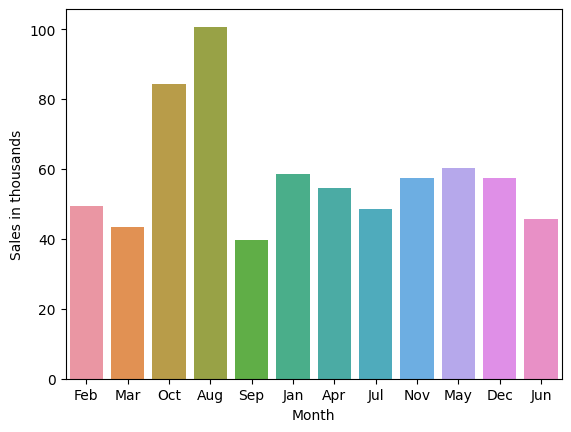

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Month',y = 'Sales in thousands',data = carp,ci=None)
plt.show()

Aug has the highest sales in thousands and Sep has the lowest sales in thousands

In [ ]:
carp.head()

,Manufacturer,Model,Sales in thousands,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Latest Launch,Fuel efficiency_imputed,4-year resale value_imputed,Day,Month,Year
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,02-Feb-14,28,16.360,02,Feb,2014
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,06-Mar-15,25,19.875,06,Mar,2015
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,03-Oct-15,22,29.725,03,Oct,2015
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,10-Aug-15,27,22.255,10,Aug,2015
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,08-Sep-15,22,23.555,08,Sep,2015


In [ ]:
carp.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', 'Vehicle type',
       'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb weight', 'Fuel capacity', 'Latest Launch',
       'Fuel efficiency_imputed', '4-year resale value_imputed', 'Day',
       'Month', 'Year'],
      dtype='object')

In [ ]:
carp['Vehicle type'].unique()
#  Passenger Vehicles are considered to carry Passengers only whereas Car is meant for personal.

array(['Passenger', 'Car'], dtype=object)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

carp['Vehicle type']= label_encoder.fit_transform(carp['Vehicle type'])

In [ ]:
carp['Vehicle type'].unique()

array([1, 0])

In [ ]:
carp.head()

,Manufacturer,Model,Sales in thousands,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Latest Launch,Fuel efficiency_imputed,4-year resale value_imputed,Day,Month,Year
0,Acura,Integra,16.919,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,02-Feb-14,28,16.360,02,Feb,2014
1,Acura,TL,39.384,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,06-Mar-15,25,19.875,06,Mar,2015
3,Acura,RL,8.588,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,03-Oct-15,22,29.725,03,Oct,2015
4,Audi,A4,20.397,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,10-Aug-15,27,22.255,10,Aug,2015
5,Audi,A6,18.780,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,08-Sep-15,22,23.555,08,Sep,2015


<ipython-input-44-23eb36f1b066>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x="Vehicle type",hue="Vehicle type",y="Sales in thousands",data=carp,ci=0,dodge=False)


<Axes: xlabel='Vehicle type', ylabel='Sales in thousands'>

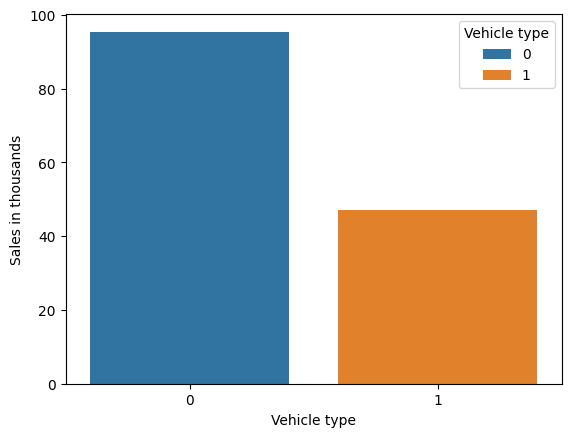

In [ ]:
sns.barplot(x="Vehicle type",hue="Vehicle type",y="Sales in thousands",data=carp,ci=0,dodge=False)

# Passenger Vehicles are considered to carry Passengers only whereas Car is meant for personal.

**Passenger Vehicles are considered to carry Passengers only whereas Car is meant for personal.**


Vehicle Type (Car) has the highest number of sales.


<ipython-input-45-63838a455af9>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x="Vehicle type",hue="Vehicle type",y="Price in thousands",data=carp,ci=0,dodge=False)


<Axes: xlabel='Vehicle type', ylabel='Price in thousands'>

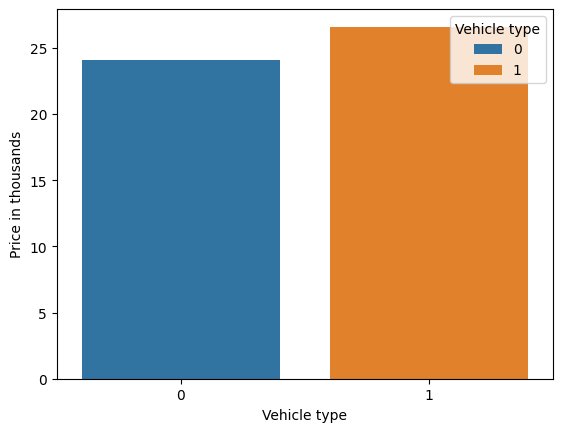

In [ ]:
sns.barplot(x="Vehicle type",hue="Vehicle type",y="Price in thousands",data=carp,ci=0,dodge=False)

**Passenger Vehicles are considered to carry Passengers only whereas Car is meant for personal.**


Vehicle Type (Passenger) has the highest number of sales.

In [ ]:
manf=pd.DataFrame(carp['Manufacturer'].value_counts())
manf.head()

,Manufacturer
Ford,10
Dodge,9
Chevrolet,8
Toyota,8
Mitsubishi,7


<Axes: >

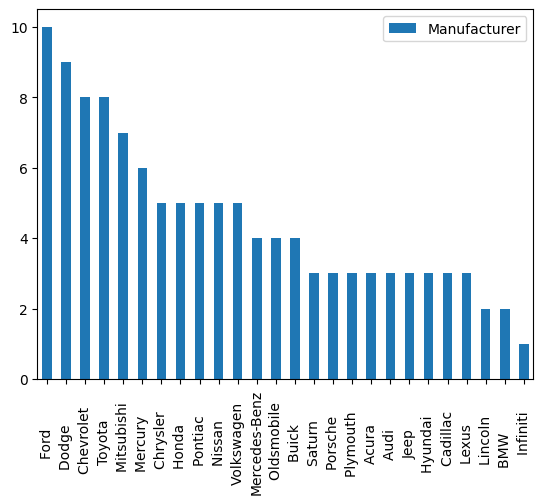

In [ ]:
manf.plot(kind="bar")

Ford is the highest Manufacturer among the other manufacturer.

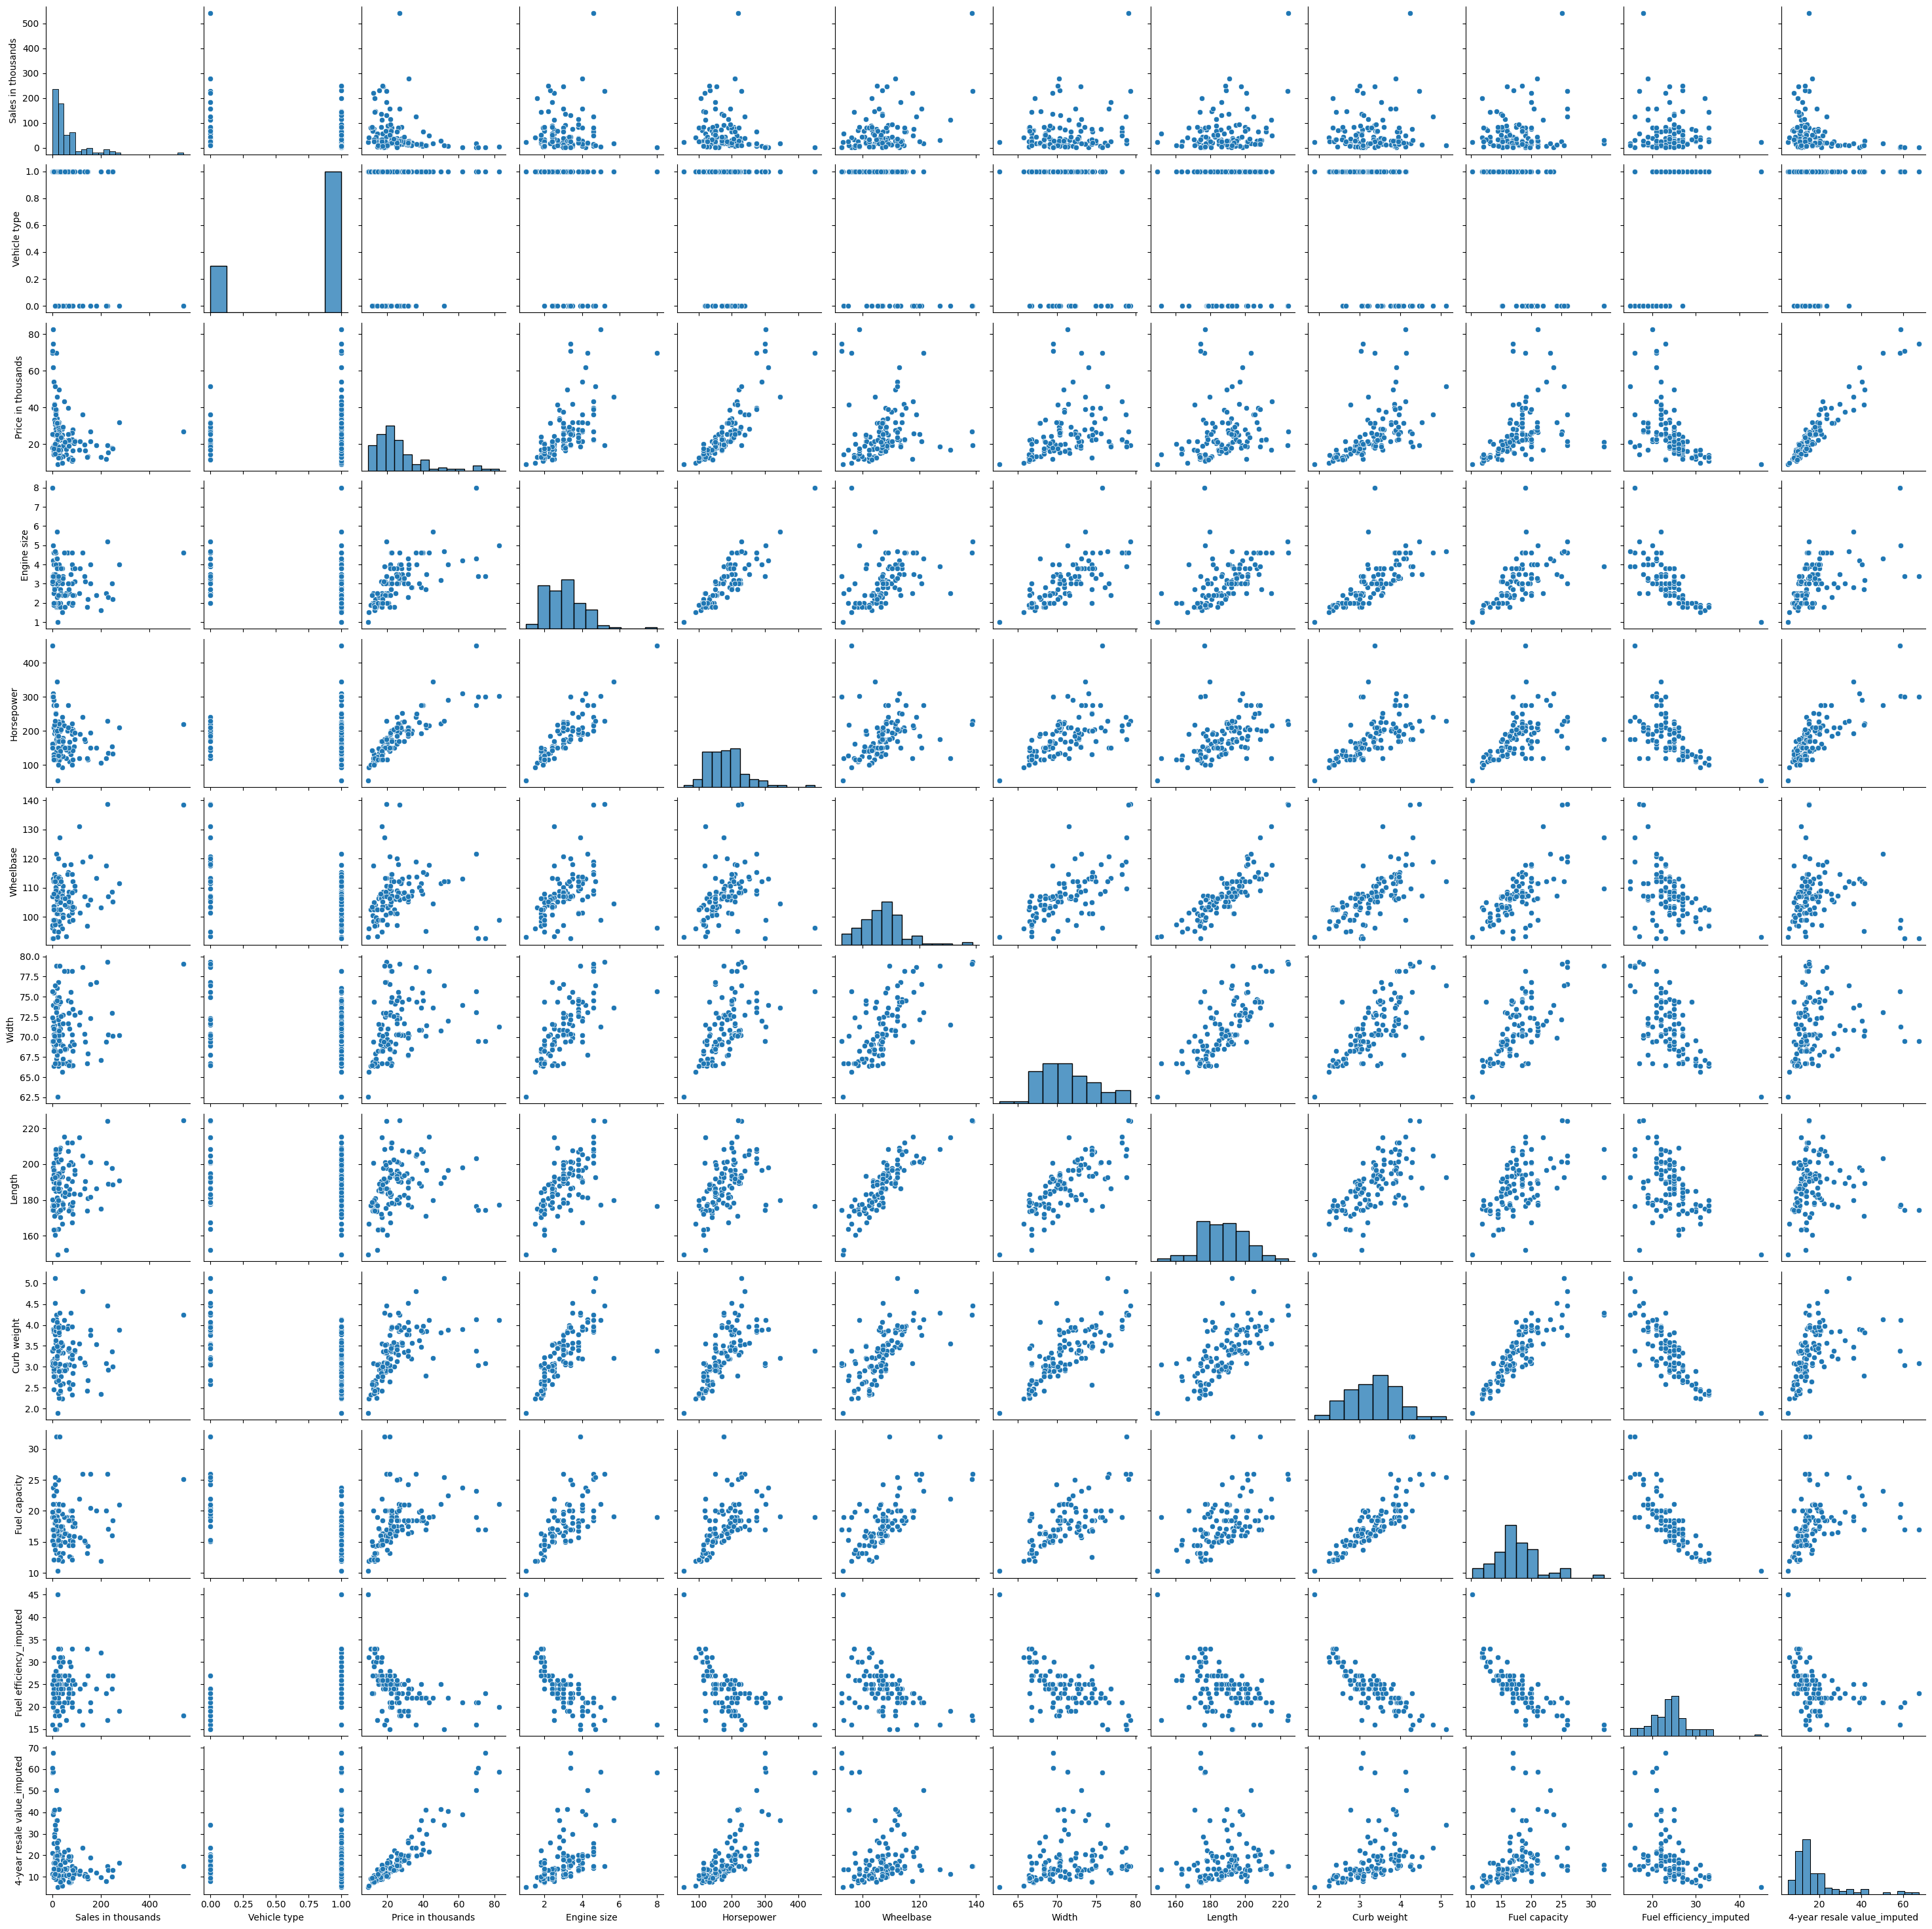

In [ ]:
sns.pairplot(carp)

In [ ]:
carp.head()

,Manufacturer,Model,Sales in thousands,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Latest Launch,Fuel efficiency_imputed,4-year resale value_imputed,Day,Month,Year
0,Acura,Integra,16.919,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,02-Feb-14,28,16.360,02,Feb,2014
1,Acura,TL,39.384,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,06-Mar-15,25,19.875,06,Mar,2015
3,Acura,RL,8.588,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,03-Oct-15,22,29.725,03,Oct,2015
4,Audi,A4,20.397,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,10-Aug-15,27,22.255,10,Aug,2015
5,Audi,A6,18.780,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,08-Sep-15,22,23.555,08,Sep,2015


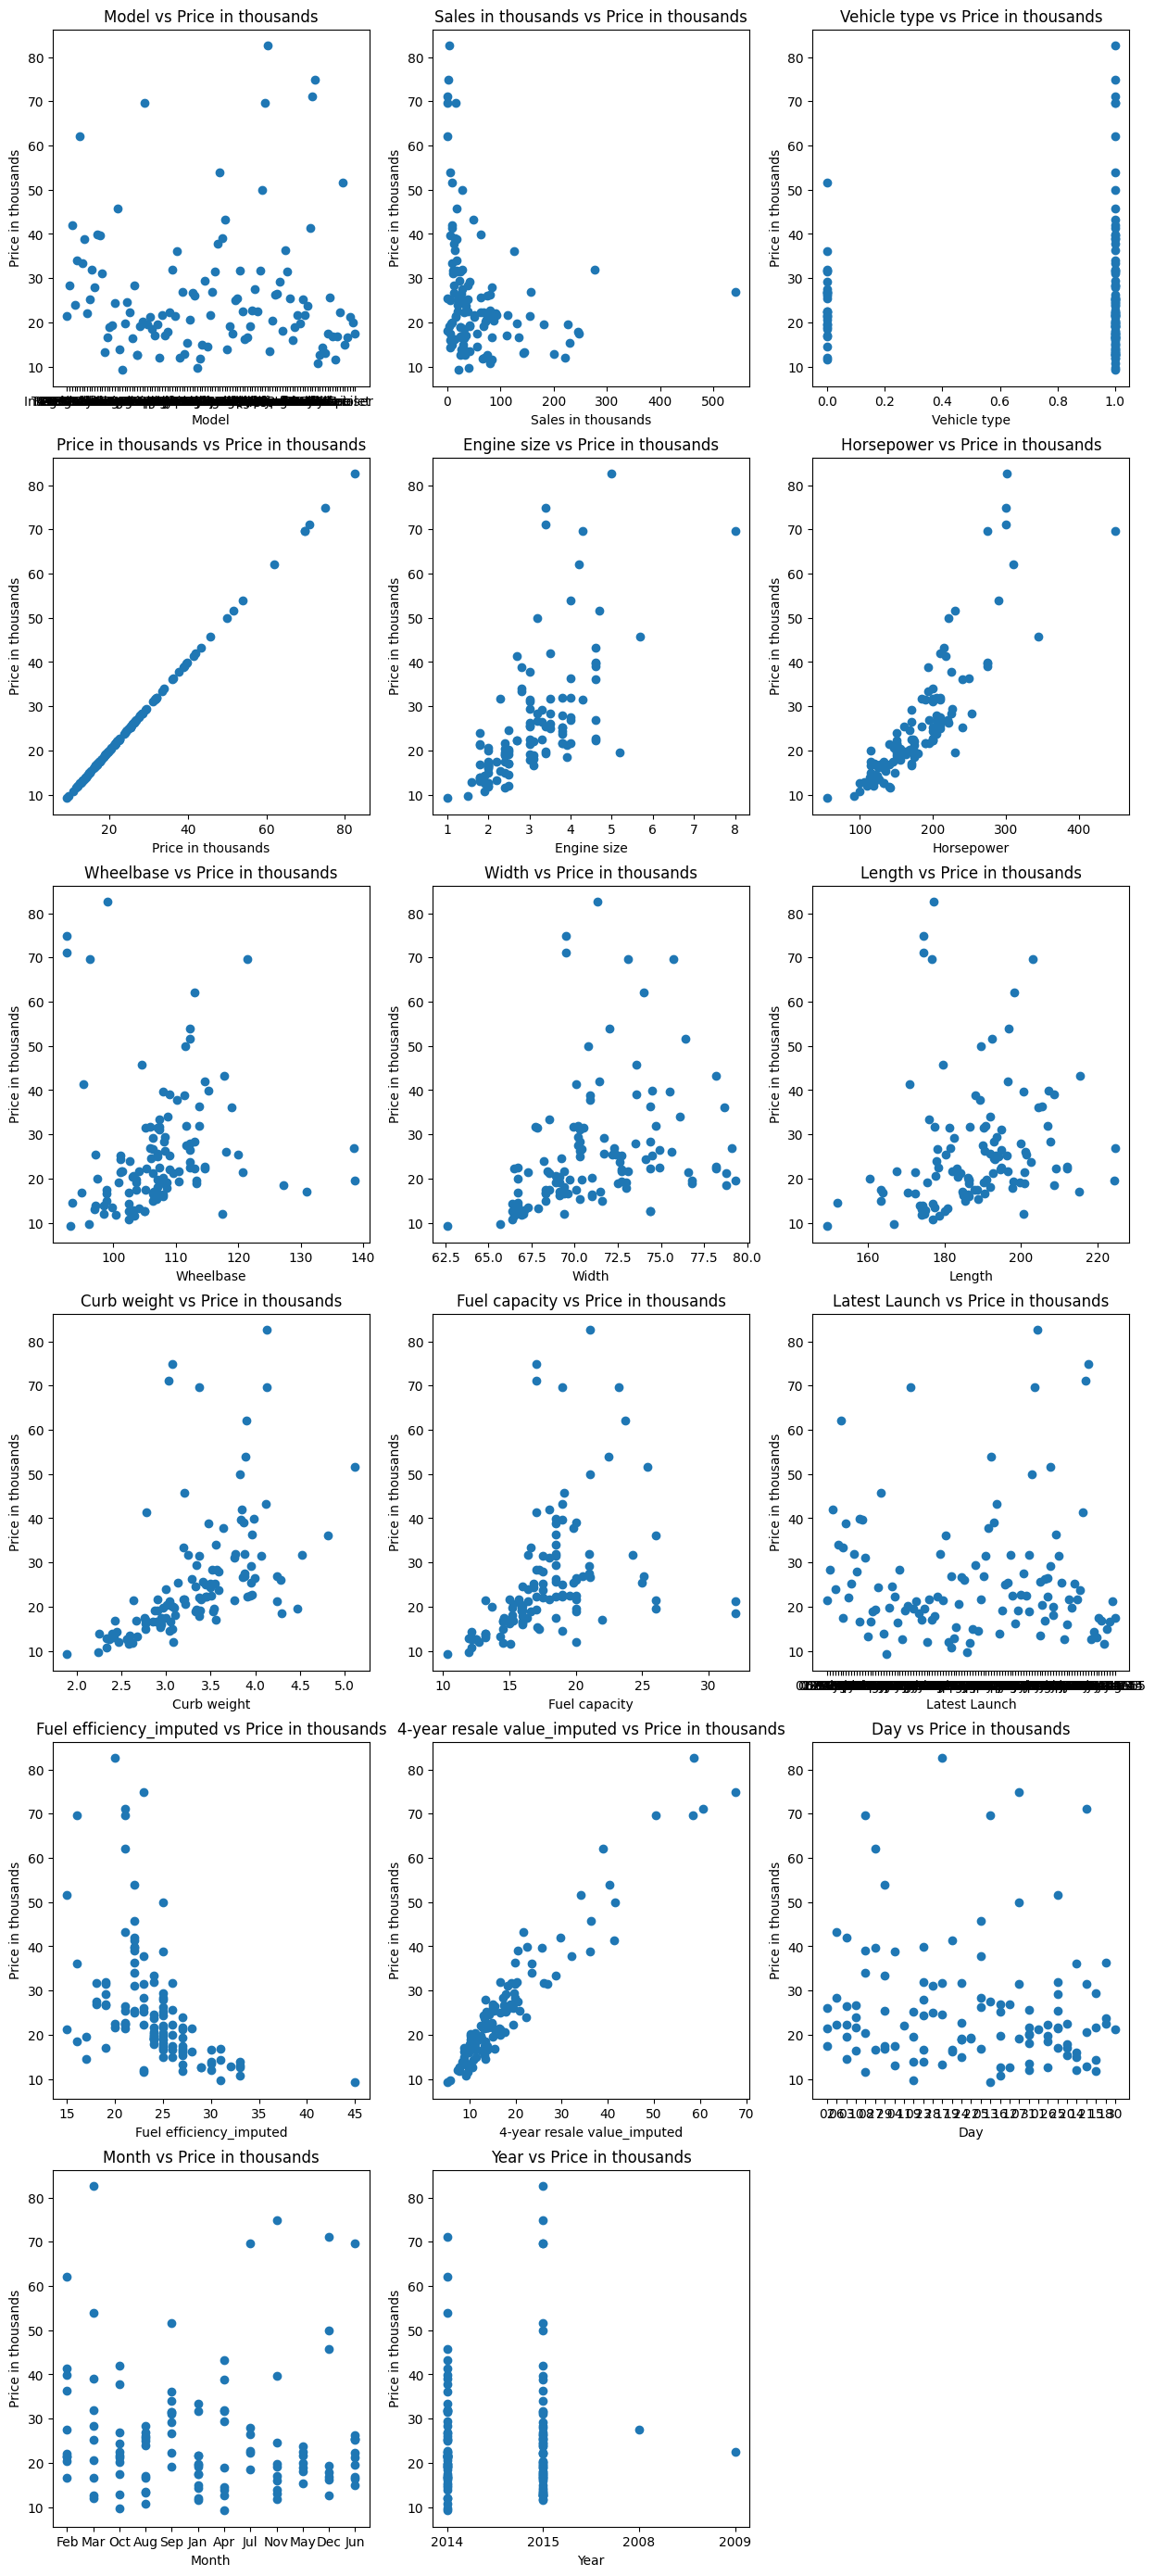

In [ ]:
# Defining a function to plot scatter plots for given column against Price
def scatter(col, fig):
    plt.subplot(6,3,fig)
    plt.scatter(carp[col],carp['Price in thousands'])
    plt.title(col + ' vs Price in thousands')
    plt.ylabel('Price in thousands')
    plt.xlabel(col)

plt.figure(figsize=(15, 35))

i = 1
for col in carp.columns[1:]:
    scatter(col, i)
    i += 1

plt.show()

1. We can see that there is no relatioship between the Latest Launch, Month, Day,Model with respect to price .
2. Sales in thousands,4-year resale value,Price in thousands,Engine size, Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity are positively correlated with price.
3. Fuel Efficiency is negatively correlated with price.


<ipython-input-52-ddc0a29d2b19>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(carp.corr(), annot = True)


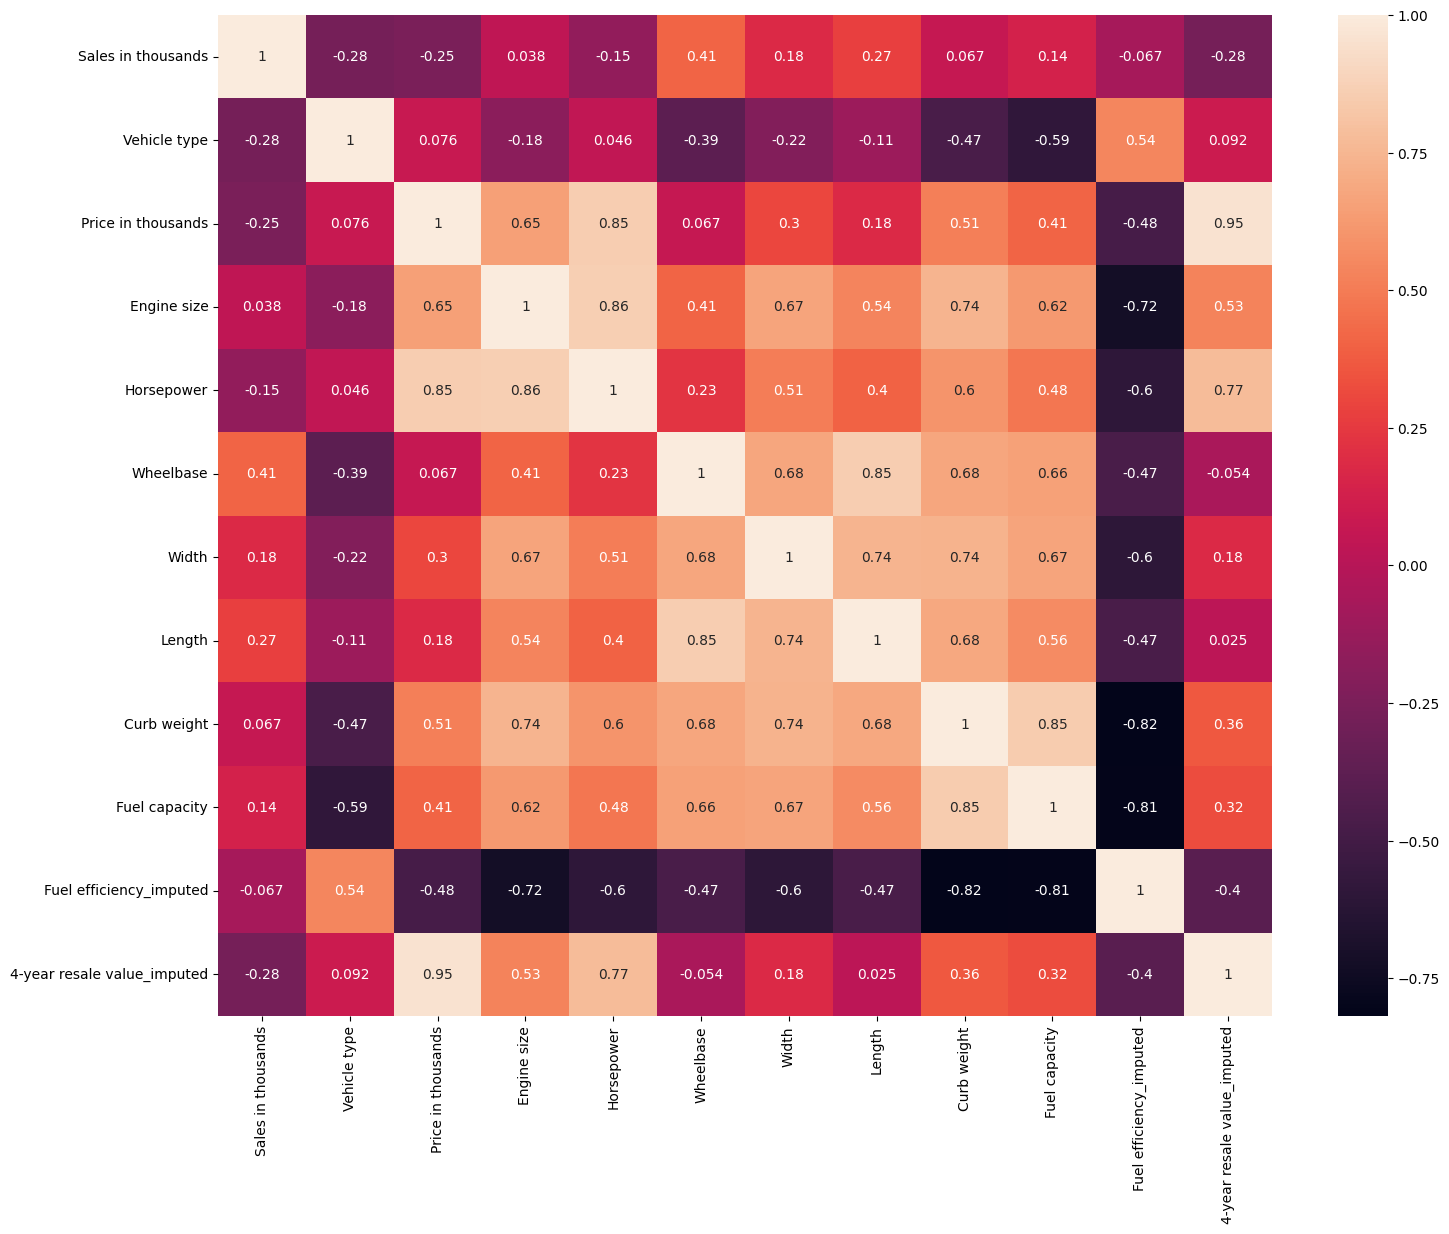

In [ ]:
plt.figure(figsize = (17, 13))

sns.heatmap(carp.corr(), annot = True)
plt.show()

In [ ]:
carp.columns


Index(['Manufacturer', 'Model', 'Sales in thousands', 'Vehicle type',
       'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb weight', 'Fuel capacity', 'Latest Launch',
       'Fuel efficiency_imputed', '4-year resale value_imputed', 'Day',
       'Month', 'Year'],
      dtype='object')

In [ ]:
carp_lr = carp[['Sales in thousands', 'Vehicle type',
       'Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Fuel capacity', 'Year', 'Fuel efficiency_imputed',
       'Curb weight', 'Price in thousands',
       '4-year resale value_imputed']].copy()
carp_lr.head()

,Sales in thousands,Vehicle type,Engine size,Horsepower,Wheelbase,Width,Length,Fuel capacity,Year,Fuel efficiency_imputed,Curb weight,Price in thousands,4-year resale value_imputed
0,16.919,1,1.8,140.0,101.2,67.3,172.4,13.2,2014,28,2.639,21.50,16.360
1,39.384,1,3.2,225.0,108.1,70.3,192.9,17.2,2015,25,3.517,28.40,19.875
3,8.588,1,3.5,210.0,114.6,71.4,196.6,18.0,2015,22,3.850,42.00,29.725
4,20.397,1,1.8,150.0,102.6,68.2,178.0,16.4,2015,27,2.998,23.99,22.255
5,18.780,1,2.8,200.0,108.7,76.1,192.0,18.5,2015,22,3.561,33.95,23.555


In [ ]:
carp_lr['Year'].astype(object).astype(int)

0      2014
1      2015
3      2015
4      2015
5      2015
       ... 
145    2015
146    2015
147    2014
148    2015
149    2015
Name: Year, Length: 117, dtype: int64

<ipython-input-56-79550202947d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(carp_lr.drop(['Price in thousands'], axis=1).corr(), annot = True)


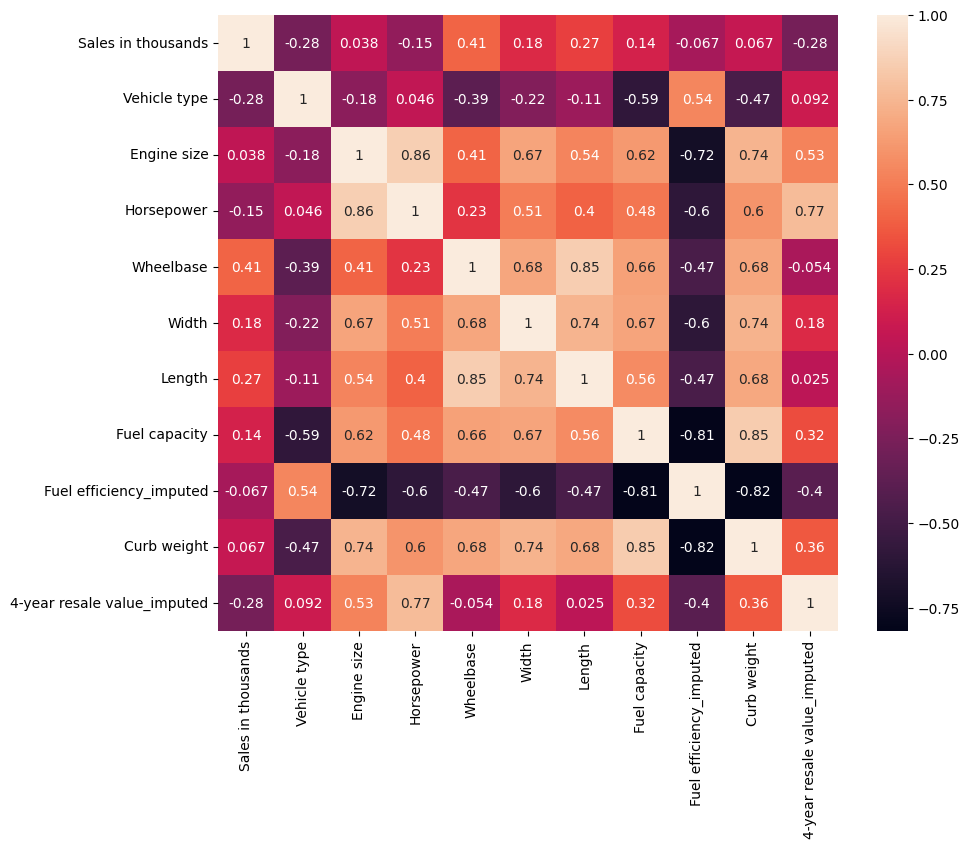

In [ ]:
plt.figure(figsize = (10,8))

sns.heatmap(carp_lr.drop(['Price in thousands'], axis=1).corr(), annot = True)
plt.show()

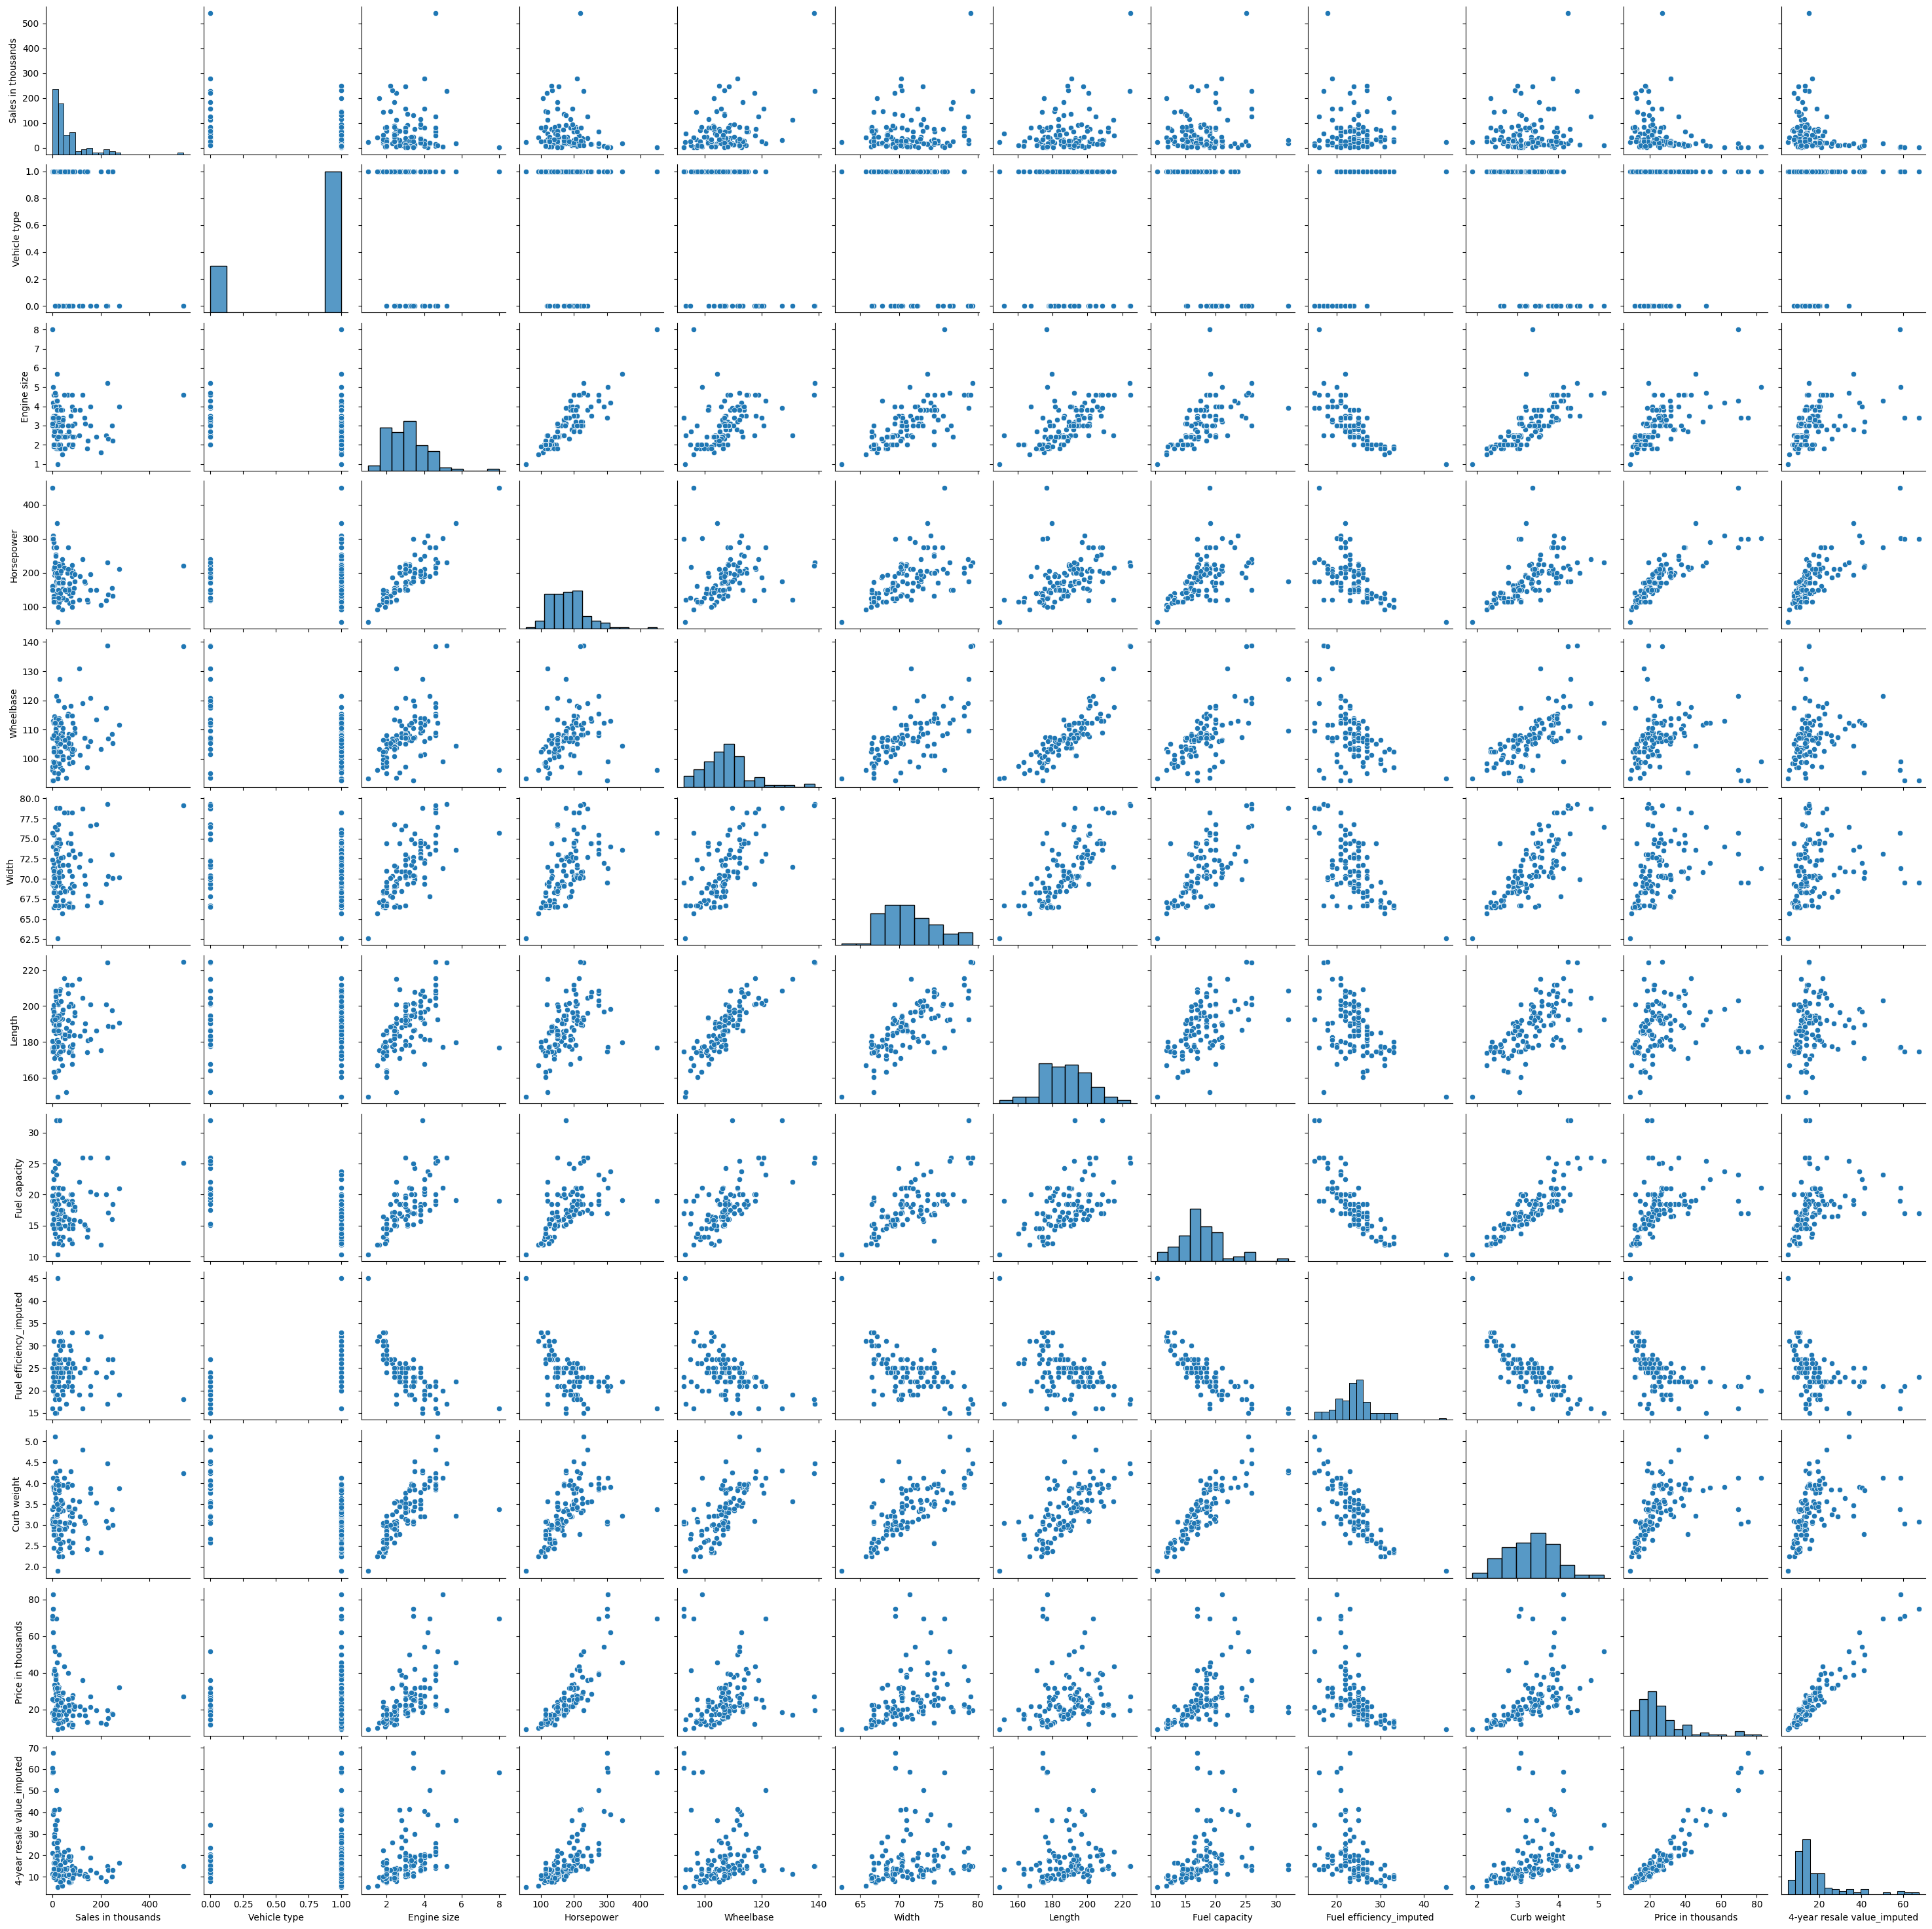

In [ ]:
sns.pairplot(carp_lr)
plt.show()

In [ ]:
carp_final=carp_lr.drop(['Vehicle type','Fuel efficiency_imputed'], axis=1)
carp_final.head()


,Sales in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Fuel capacity,Year,Curb weight,Price in thousands,4-year resale value_imputed
0,16.919,1.8,140.0,101.2,67.3,172.4,13.2,2014,2.639,21.50,16.360
1,39.384,3.2,225.0,108.1,70.3,192.9,17.2,2015,3.517,28.40,19.875
3,8.588,3.5,210.0,114.6,71.4,196.6,18.0,2015,3.850,42.00,29.725
4,20.397,1.8,150.0,102.6,68.2,178.0,16.4,2015,2.998,23.99,22.255
5,18.780,2.8,200.0,108.7,76.1,192.0,18.5,2015,3.561,33.95,23.555


In [ ]:
X = carp_final.drop(['Price in thousands'], axis=1)
X.head()
y = carp_final['Price in thousands']
y.head()

0    21.50
1    28.40
3    42.00
4    23.99
5    33.95
Name: Price in thousands, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Creating a fitting the Linear Regression Model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Regression Coefficients
reg.coef_

array([-0.00434702,  0.64082367,  0.03744518, -0.07348784, -0.0839125 ,
        0.05308237, -0.28179167,  0.58945071,  4.05861292,  0.96004941])

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([36.95254387, 32.69331999, 12.38292368, 26.27412629, 31.07094839,
       27.18021656, 17.80240313, 17.65195996, 17.55125165, 24.24255717,
       17.68211378, 17.32393358, 28.18557678, 13.08516923, 20.66794506,
       20.31749818, 35.06534807, 15.14748951, 21.05525531, 11.02309339,
       26.76529158, 24.24392275, 21.67485206, 37.03002913, 12.87010679,
       30.92609556, 78.22888288, 22.84707999, 16.63354595,  3.41432228])

R-squared = 0.9475353258564574


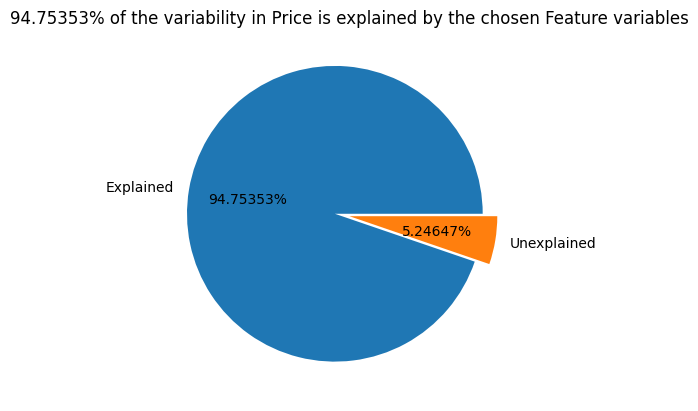

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2Percent = r2 * 100
print("R-squared =", r2)

data = [r2Percent, 100-r2Percent]
keys = ["Explained", "Unexplained"]
explode = [0.1, 0]

plt.title(f"{r2Percent:.5f}% of the variability in Price is explained by the chosen Feature variables")
plt.pie(data, labels=keys, explode=explode, autopct='%.5f%%')
plt.show()